Importing necessary Library

In [62]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

Load the Dataset

In [63]:
dataset=sns.load_dataset("iris")
print(dataset.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Steps in hypothesis Testing
<ul><li>Formulating hypothesis</li>
Null Hypothesis(H0)=There is no significant difference between the mean of Verginica and  mean of Versicolor regarding the sepal_length <br>
Alternative Hypothesis(H<sub>a</sub>)=There is significant difference the  mean of Verginica and mean of Versicolor regarding the sepal_length
<li>Selecting Significance Level(alpha)=5%</li>
<li>Checking the assumption of data</li>


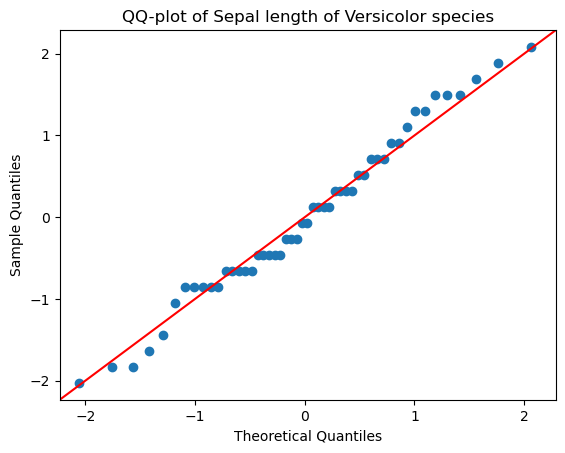

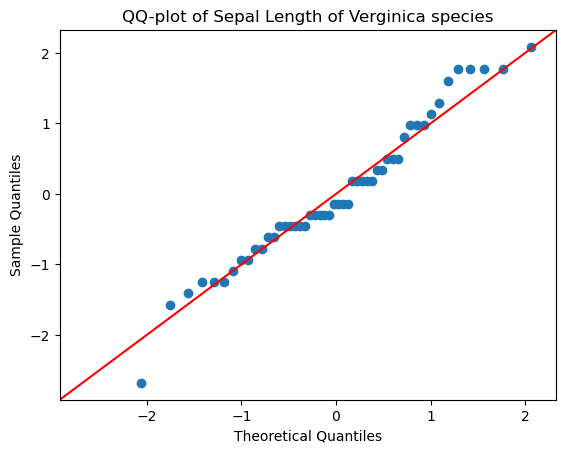

Verginica: ShapiroResult(statistic=0.9267684372189469, pvalue=0.24403085415816067)
Versicolor: ShapiroResult(statistic=0.9515362753621068, pvalue=0.5489658807587465)
LeveneResult(statistic=0.7429305912596398, pvalue=0.3960457851226379)


In [64]:
df_versicolor=dataset[dataset['species']=="versicolor"]["sepal_length"]
df_virginica=dataset[dataset['species']=="virginica"]["sepal_length"]
sample_versicolor=df_versicolor.sample(15)
sample_virginica=df_virginica.sample(15)
#Checking the normality of data using qq-plot
fig=sm.qqplot(df_versicolor,line='45',fit=True)
plt.title("QQ-plot of Sepal length of Versicolor species")
plt.show()
fig=sm.qqplot(df_virginica,line='45',fit=True)
plt.title("QQ-plot of Sepal Length of Verginica species")
plt.show()
#Checking the normality using Shapiro-Wilk test
Verginica_shapiro_data=stats.shapiro(sample_virginica)
Versicolor_shapiro_data=stats.shapiro(sample_versicolor)
print("Verginica:",Verginica_shapiro_data)
print("Versicolor:",Versicolor_shapiro_data)
#Checking the equal variance using levene test
levene_test=stats.levene(sample_versicolor,sample_virginica)
print(levene_test)


Based on the assumption and due to the absence of population standard deviation and presence of two independent sample we are conducting  the two Sample t-test

In [65]:
t_statistics,p_value=stats.ttest_ind(sample_virginica,sample_versicolor)
print("t_statistics:",t_statistics)
print("p_value:",p_value)

t_statistics: 3.381721434826874
p_value: 0.0021410422265597416


Decision:At 5% lvl of significance

In [66]:
alpha=5/100
if(alpha>=p_value):
    print("Reject Null hypothesis and accept Alternativa hypothesis")
else:
    print("Accept Null hypothesis and reject Alternative hypothesis")

Reject Null hypothesis and accept Alternativa hypothesis


Evidence:

In [67]:
print("Virginica:",df_versicolor.mean())
print("Versicolor:",df_virginica.mean())

Virginica: 5.936
Versicolor: 6.587999999999998


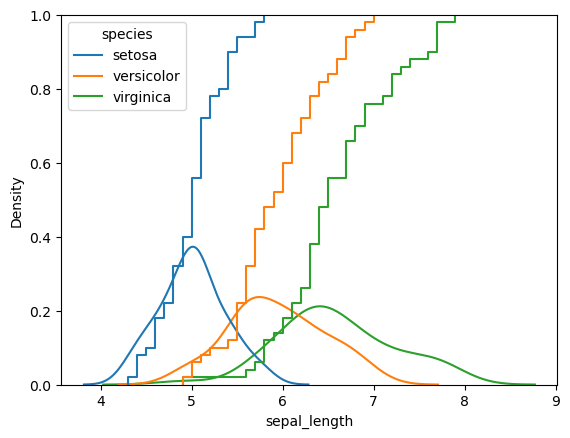

In [68]:
#Data Visulaization
sns.kdeplot(data=dataset,x='sepal_length',hue='species')
sns.ecdfplot(data=dataset,x='sepal_length',hue='species')
plt.show()